In [1]:
pip install pandas matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


Accuracy: 82.50%
Not enough classes to generate a classification report.


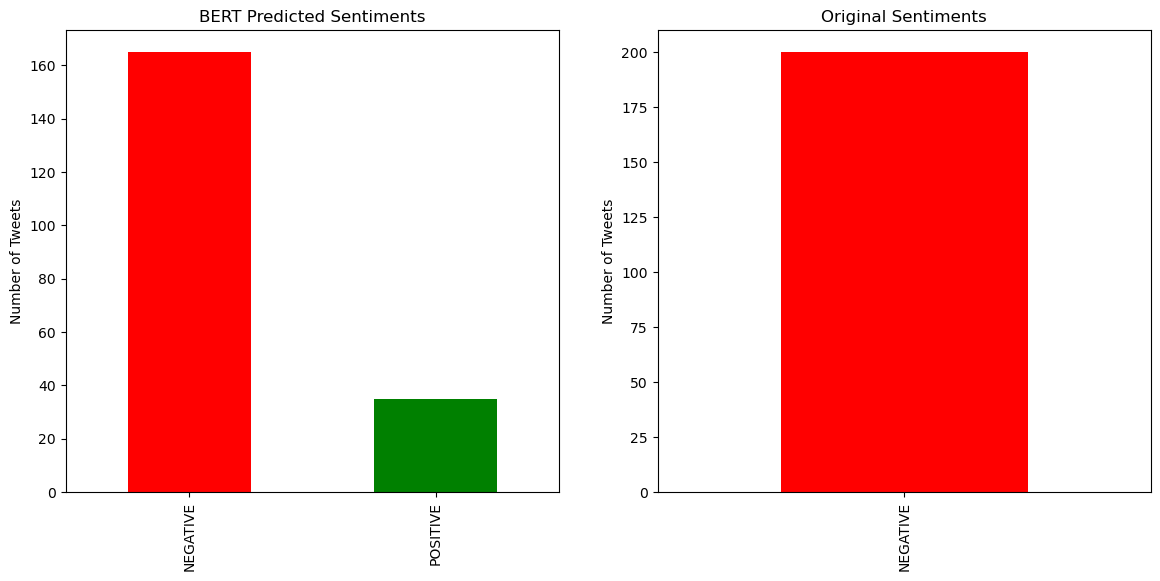

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
df = pd.read_csv('tweets_with_bert_sentiments.csv')

# Convert original sentiment to match the predicted labels format
df['original_sentiment'] = df['sentiment'].map({'NEGATIVE': 'NEGATIVE', 'POSITIVE': 'POSITIVE'})

# Calculate accuracy
accuracy = accuracy_score(df['original_sentiment'], df['bert_sentiment'])
print(f"Accuracy: {accuracy * 100:.2f}%")

# Check if both classes are present
if len(df['original_sentiment'].unique()) > 1:
    # Generate a classification report
    report = classification_report(df['original_sentiment'], df['bert_sentiment'], target_names=['NEGATIVE', 'POSITIVE'], zero_division=0)
    print("Classification Report:\n", report)
else:
    print("Not enough classes to generate a classification report.")

# Plotting the results
def plot_sentiment_analysis(df):
    sentiment_counts = df['bert_sentiment'].value_counts()
    original_sentiment_counts = df['original_sentiment'].value_counts()

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sentiment_counts.plot(kind='bar', ax=ax[0], color=['red', 'green'], title='BERT Predicted Sentiments')
    original_sentiment_counts.plot(kind='bar', ax=ax[1], color=['red', 'green'], title='Original Sentiments')

    ax[0].set_ylabel('Number of Tweets')
    ax[1].set_ylabel('Number of Tweets')

    plt.show()

plot_sentiment_analysis(df)
